### 1.	What is a neural network? What are the general steps required to build a neural network?

A neural network is composed of layers, which is a collection of neurons, with connections between different layers. These layers transform data by first calculating the weighted sum of inputs and then normalizing it using the activation functions assigned to the neurons.

The leftmost layer in a Neural Network is called the input layer, and the rightmost layer is called the output layer. The layers between the input and the output, are called the hidden layers. Any Neural Network has 1 input layer and 1 output layer. However, the number of hidden layers differ between different networks depending on the complexity of the problem. Also, each hidden layer can have its own activation function

### 2.	Generally, how do you check the performance of a neural network? Why? 

Typically, with neural networks, we seek to minimize the error which how far the predicted value from target. As such, the objective function is often referred to as a cost function or a loss function and the value calculated by the loss function is referred to as simply “loss.” The loss function has an important job in that it distill all aspects of the model down into a single number in such a way that improvements in that number are a sign of a better model.

### 3.	Create a neural network using keras to predict the outcome of either of these datasets: 

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as mse
import keras
from keras.callbacks import EarlyStopping
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV

Using TensorFlow backend.
/Users/asma/opt/anaconda3/envs/p37env/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/asma/opt/anaconda3/envs/p37env/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/asma/opt/anaconda3/envs/p37env/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/asma

In [2]:
# cleaned_abalone has been pre-processed
df= pd.read_csv("../Week_17/cleaned_abalone.csv")
df.head(5)

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,age,F,I,M
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,16.5,0,0,1
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,8.5,0,0,1
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,10.5,1,0,0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,11.5,0,0,1
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,8.5,0,1,0


In [3]:
# Features
drop_cols = ['Length', 'Height', 'Whole weight', 'age', 'F', 'M']
X = df.drop(drop_cols, axis=1)
# Target
y = df ['age']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

sc= StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

In [4]:
import keras
from keras.layers import Dense
from keras.models import Sequential

n_cols = X_train.shape[1]
model = Sequential()
model.add(Dense(100, activation='relu', input_shape = (n_cols,)))
model.add(Dense(100, activation='relu'))
model.add(Dense(1))

Instructions for updating:
Colocations handled automatically by placer.


In [5]:
early_stopping_monitor = EarlyStopping(patience=2)
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train,y_train, epochs=500,callbacks=[early_stopping_monitor])

Instructions for updating:
Use tf.cast instead.
Epoch 1/500
2797/2797 [==============================] - 0s 95us/step - loss: 54.5584
Epoch 2/500
2797/2797 [==============================] - 0s 32us/step - loss: 8.0789
Epoch 3/500
2797/2797 [==============================] - 0s 30us/step - loss: 4.1629
Epoch 4/500
  32/2797 [..............................] - ETA: 0s - loss: 4.6044

/Users/asma/opt/anaconda3/envs/p37env/lib/python3.7/site-packages/keras/callbacks.py:842: RuntimeWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


2797/2797 [==============================] - 0s 33us/step - loss: 3.8038
Epoch 5/500
2797/2797 [==============================] - 0s 29us/step - loss: 3.6653
Epoch 6/500
2797/2797 [==============================] - 0s 28us/step - loss: 3.5505
Epoch 7/500
2797/2797 [==============================] - 0s 26us/step - loss: 3.5232
Epoch 8/500
2797/2797 [==============================] - 0s 28us/step - loss: 3.4752
Epoch 9/500
2797/2797 [==============================] - 0s 27us/step - loss: 3.4068
Epoch 10/500
2797/2797 [==============================] - 0s 28us/step - loss: 3.3772
Epoch 11/500
2797/2797 [==============================] - 0s 31us/step - loss: 3.3638
Epoch 12/500
2797/2797 [==============================] - 0s 30us/step - loss: 3.3651
Epoch 13/500
2797/2797 [==============================] - 0s 29us/step - loss: 3.3866
Epoch 14/500
2797/2797 [==============================] - 0s 28us/step - loss: 3.3269
Epoch 15/500
2797/2797 [==============================] - 0s 27us/step -

2797/2797 [==============================] - 0s 30us/step - loss: 3.1055
Epoch 100/500
2797/2797 [==============================] - 0s 26us/step - loss: 3.1134
Epoch 101/500
2797/2797 [==============================] - 0s 26us/step - loss: 3.0805
Epoch 102/500
2797/2797 [==============================] - 0s 25us/step - loss: 3.0728
Epoch 103/500
2797/2797 [==============================] - 0s 26us/step - loss: 3.0850
Epoch 104/500
2797/2797 [==============================] - 0s 26us/step - loss: 3.0722
Epoch 105/500
2797/2797 [==============================] - 0s 25us/step - loss: 3.0696
Epoch 106/500
2797/2797 [==============================] - 0s 27us/step - loss: 3.0762
Epoch 107/500
2797/2797 [==============================] - 0s 26us/step - loss: 3.0826
Epoch 108/500
2797/2797 [==============================] - 0s 26us/step - loss: 3.1035
Epoch 109/500
2797/2797 [==============================] - 0s 26us/step - loss: 3.1102
Epoch 110/500
2797/2797 [==============================] 

2797/2797 [==============================] - 0s 28us/step - loss: 3.0132
Epoch 194/500
2797/2797 [==============================] - 0s 27us/step - loss: 3.0228
Epoch 195/500
2797/2797 [==============================] - 0s 26us/step - loss: 3.0179
Epoch 196/500
2797/2797 [==============================] - 0s 26us/step - loss: 2.9831
Epoch 197/500
2797/2797 [==============================] - 0s 27us/step - loss: 2.9997
Epoch 198/500
2797/2797 [==============================] - 0s 26us/step - loss: 2.9826
Epoch 199/500
2797/2797 [==============================] - 0s 25us/step - loss: 3.0326
Epoch 200/500
2797/2797 [==============================] - 0s 26us/step - loss: 2.9864
Epoch 201/500
2797/2797 [==============================] - 0s 26us/step - loss: 2.9670
Epoch 202/500
2797/2797 [==============================] - 0s 26us/step - loss: 2.9925
Epoch 203/500
2797/2797 [==============================] - 0s 26us/step - loss: 3.0056
Epoch 204/500
2797/2797 [==============================] 

2797/2797 [==============================] - 0s 25us/step - loss: 2.9206
Epoch 288/500
2797/2797 [==============================] - 0s 26us/step - loss: 2.9821
Epoch 289/500
2797/2797 [==============================] - 0s 25us/step - loss: 2.9421
Epoch 290/500
2797/2797 [==============================] - 0s 26us/step - loss: 2.9229
Epoch 291/500
2797/2797 [==============================] - 0s 25us/step - loss: 2.9192
Epoch 292/500
2797/2797 [==============================] - 0s 25us/step - loss: 2.9310
Epoch 293/500
2797/2797 [==============================] - 0s 25us/step - loss: 2.9142
Epoch 294/500
2797/2797 [==============================] - 0s 27us/step - loss: 2.9390
Epoch 295/500
2797/2797 [==============================] - 0s 27us/step - loss: 2.9370
Epoch 296/500
2797/2797 [==============================] - 0s 27us/step - loss: 2.9224
Epoch 297/500
2797/2797 [==============================] - 0s 27us/step - loss: 2.9341
Epoch 298/500
2797/2797 [==============================] 

2797/2797 [==============================] - 0s 26us/step - loss: 2.8732
Epoch 382/500
2797/2797 [==============================] - 0s 26us/step - loss: 2.8409
Epoch 383/500
2797/2797 [==============================] - 0s 26us/step - loss: 2.8845
Epoch 384/500
2797/2797 [==============================] - 0s 26us/step - loss: 2.8679
Epoch 385/500
2797/2797 [==============================] - 0s 26us/step - loss: 2.8352
Epoch 386/500
2797/2797 [==============================] - 0s 27us/step - loss: 2.9190
Epoch 387/500
2797/2797 [==============================] - 0s 26us/step - loss: 2.8254
Epoch 388/500
2797/2797 [==============================] - 0s 26us/step - loss: 2.8628
Epoch 389/500
2797/2797 [==============================] - 0s 27us/step - loss: 2.8496
Epoch 390/500
2797/2797 [==============================] - 0s 26us/step - loss: 2.8654
Epoch 391/500
2797/2797 [==============================] - 0s 26us/step - loss: 2.8862
Epoch 392/500
2797/2797 [==============================] 

2797/2797 [==============================] - 0s 28us/step - loss: 2.7768
Epoch 476/500
2797/2797 [==============================] - 0s 27us/step - loss: 2.7754
Epoch 477/500
2797/2797 [==============================] - 0s 28us/step - loss: 2.7900
Epoch 478/500
2797/2797 [==============================] - 0s 27us/step - loss: 2.7688
Epoch 479/500
2797/2797 [==============================] - 0s 28us/step - loss: 2.7793
Epoch 480/500
2797/2797 [==============================] - 0s 27us/step - loss: 2.7910
Epoch 481/500
2797/2797 [==============================] - 0s 27us/step - loss: 2.7727
Epoch 482/500
2797/2797 [==============================] - 0s 26us/step - loss: 2.8187
Epoch 483/500
2797/2797 [==============================] - 0s 27us/step - loss: 2.7824
Epoch 484/500
2797/2797 [==============================] - 0s 27us/step - loss: 2.7735
Epoch 485/500
2797/2797 [==============================] - 0s 27us/step - loss: 2.8100
Epoch 486/500
2797/2797 [==============================] 

In [6]:
y_pred = model.predict(X_test)
y_pred

array([[10.735717 ],
       [13.204837 ],
       [10.772394 ],
       ...,
       [13.240653 ],
       [11.8873415],
       [14.9586   ]], dtype=float32)

In [7]:
rmse= mse(y_test,y_pred,squared=False)
print(rmse)

1.9919155117445708


### 4. Write another algorithm to predict the same result as the previous question using either KNN or logistic regression.

In [8]:
knn=KNeighborsRegressor()
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
rmse= mse(y_test,y_pred_knn,squared=False)
print(rmse)

2.0393460823761833


In [9]:
knn.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [ ]:
params = {'n_neighbors': range(5,100),
              'weights': ['uniform', 'distance'],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'leaf_size': range(30,50)
    
}
knn_grid = GridSearchCV(knn, 
                    param_grid = params, 
                    cv=10,
                    scoring = 'neg_root_mean_squared_error')


knn_grid.fit(X_train, y_train)


print(knn_grid.best_params_)
print(knn_grid.best_score_)

### 5.	Create a neural network using pytorch to predict the same result as question 3.

### 6. Compare the performance of the neural networks to the other model you created. Which performed better? Why do you think that is? 

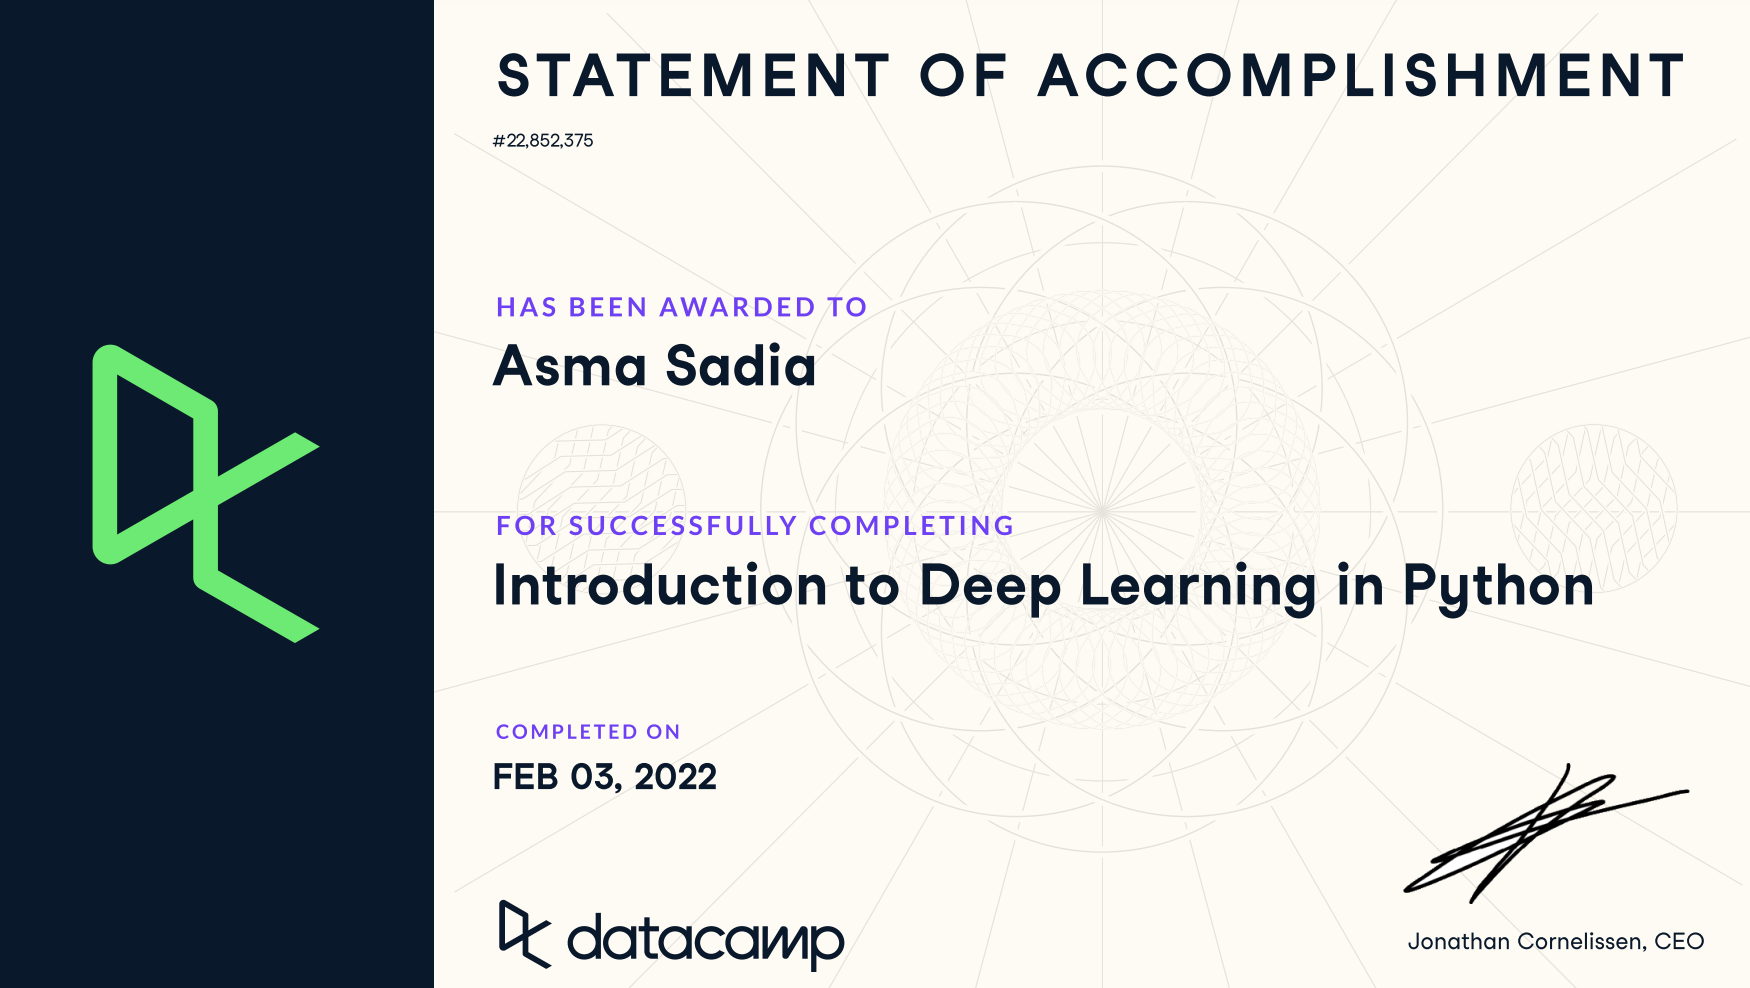